# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 4.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
194787,0.1172,0.0073,0.0049,0.0024,0.0024,0.0024,0.0024,0.0342,0.0024,0.0024,2,0,12,0
260226,1.9995,0.5933,0.5103,0.1270,0.1074,0.2856,0.5640,0.6714,0.5396,0.5933,8,8,2,2
113179,0.2539,0.1221,0.1538,0.0024,0.0098,0.0928,0.7007,0.2466,0.1416,0.1074,5,5,2,2
438860,0.2588,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0562,0.0439,0.0293,0,0,0,0
425285,0.0220,0.0122,0.0024,0.0024,0.0024,0.0024,0.0049,0.0073,0.0024,0.0439,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455868 entries, 0 to 455867
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          455868 non-null  float64
 1   Emg2          455868 non-null  float64
 2   Emg3          455868 non-null  float64
 3   Emg4          455868 non-null  float64
 4   Emg5          455868 non-null  float64
 5   Emg6          455868 non-null  float64
 6   Emg7          455868 non-null  float64
 7   Emg8          455868 non-null  float64
 8   Emg9          455868 non-null  float64
 9   Emg10         455868 non-null  float64
 10  repetition    455868 non-null  int64  
 11  rerepetition  455868 non-null  int64  
 12  stimulus      455868 non-null  int64  
 13  restimulus    455868 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.7 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000
mean,0.332545,0.058456,0.049844,0.023382,0.009703,0.035887,0.191725,0.173032,0.070132,0.065993,3.237610,2.511964,5.738133,4.701942
std,0.467568,0.142487,0.139377,0.102822,0.028035,0.069141,0.267717,0.180930,0.153322,0.110593,3.490469,3.337748,6.599320,6.493878
min,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022000,0.002400,0.002400,0.002400,0.002400,0.002400,0.014600,0.048800,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.105000,0.002400,0.002400,0.002400,0.002400,0.009800,0.117200,0.112300,0.004900,0.026900,2.000000,0.000000,3.000000,0.000000
75%,0.476100,0.056200,0.024400,0.002400,0.002400,0.039100,0.263700,0.239300,0.083000,0.078100,6.000000,5.000000,10.000000,9.000000
max,4.458000,4.514200,3.064000,3.234900,0.803200,1.042500,4.663100,2.041000,3.513200,1.562500,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     187582
8      15555
12     15514
7      15504
4      15498
2      15497
5      15479
9      15471
6      15468
11     15465
10     15440
1      15430
3      15426
17     10355
14     10338
13     10335
15     10310
16     10267
19      5186
18      5170
21      5164
20      5142
23      5138
22      5134
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.747336,-0.425809,-0.369228,-0.221498,-0.282907,-0.514572,-0.209574,-0.758034,-0.476509,-0.502027
1,-0.747336,-0.425809,-0.369228,-0.221498,-0.282907,-0.514572,-0.140739,-0.732198,-0.476509,-0.522430
2,-0.747336,-0.425809,-0.369228,-0.221498,-0.282907,-0.514572,-0.140739,-0.706361,-0.476509,-0.502027
3,-0.747336,-0.425809,-0.369228,-0.221498,-0.282907,-0.514572,-0.183805,-0.719016,-0.476509,-0.522430
4,-0.747336,-0.425809,-0.369228,-0.221498,-0.282907,-0.514572,-0.209574,-0.706361,-0.476509,-0.542833
...,...,...,...,...,...,...,...,...,...,...
385172,-0.258607,-0.409455,-0.369228,-0.221498,-0.282907,-0.514572,-0.718252,0.001772,-0.476509,-0.605743
385173,-0.273516,-0.425809,-0.369228,-0.221498,-0.282907,-0.514572,-0.718252,-0.062556,-0.476509,-0.605743
385174,-0.283523,-0.425809,-0.369228,-0.221498,-0.282907,-0.514572,-0.718252,-0.114229,-0.476509,-0.605743
385175,-0.328454,-0.425809,-0.352536,-0.221498,-0.282907,-0.514572,-0.718252,-0.178557,-0.476509,-0.605743


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
76/76 [==============================] - 10s 30ms/step - loss: 1.5297 - accuracy: 0.5929 - val_loss: 1.1803 - val_accuracy: 0.6681
Epoch 2/100
76/76 [==============================] - 2s 27ms/step - loss: 1.0634 - accuracy: 0.7005 - val_loss: 0.9706 - val_accuracy: 0.7259
Epoch 3/100
76/76 [==============================] - 2s 27ms/step - loss: 0.9382 - accuracy: 0.7329 - val_loss: 0.8898 - val_accuracy: 0.7447
Epoch 4/100
76/76 [==============================] - 2s 26ms/step - loss: 0.8671 - accuracy: 0.7516 - val_loss: 0.8383 - val_accuracy: 0.7593
Epoch 5/100
76/76 [==============================] - 2s 26ms/step - loss: 0.8179 - accuracy: 0.7641 - val_loss: 0.7884 - val_accuracy: 0.7740
Epoch 6/100
76/76 [==============================] - 2s 26ms/step - loss: 0.7779 - accuracy: 0.7747 - val_loss: 0.7583 - val_accuracy: 0.7782
Epoch 7/100
76/76 [==============================] - 2s 27ms/step - loss: 0.7452 - accuracy: 0.7828 - val_loss: 0.7204 - val_accuracy: 0.7890
Epoch

76/76 [==============================] - 2s 27ms/step - loss: 0.3391 - accuracy: 0.8969 - val_loss: 0.3985 - val_accuracy: 0.8821
Epoch 59/100
76/76 [==============================] - 2s 28ms/step - loss: 0.3376 - accuracy: 0.8968 - val_loss: 0.3909 - val_accuracy: 0.8840
Epoch 60/100
76/76 [==============================] - 2s 27ms/step - loss: 0.3402 - accuracy: 0.8964 - val_loss: 0.3981 - val_accuracy: 0.8818
Epoch 61/100
76/76 [==============================] - 2s 28ms/step - loss: 0.3343 - accuracy: 0.8985 - val_loss: 0.3925 - val_accuracy: 0.8844
Epoch 62/100
76/76 [==============================] - 2s 27ms/step - loss: 0.3280 - accuracy: 0.8999 - val_loss: 0.3879 - val_accuracy: 0.8848
Epoch 63/100
76/76 [==============================] - 2s 27ms/step - loss: 0.3239 - accuracy: 0.9016 - val_loss: 0.3955 - val_accuracy: 0.8830
Epoch 64/100
76/76 [==============================] - 2s 27ms/step - loss: 0.3251 - accuracy: 0.9012 - val_loss: 0.3803 - val_accuracy: 0.8868
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

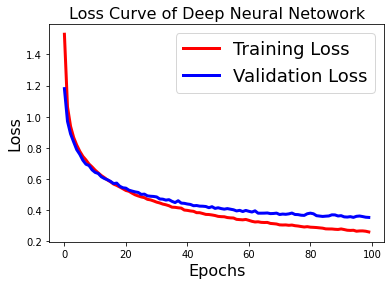

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

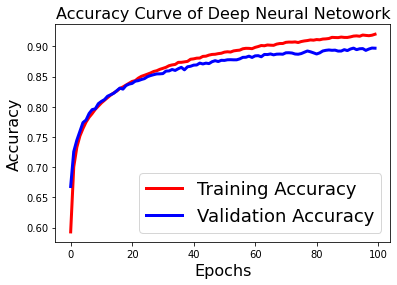

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([0, 5, 6, ..., 0, 9, 0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

5

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 89.71389999480762


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     36204
           1       0.93      0.85      0.89      2317
           2       0.94      0.80      0.87      1955
           3       0.94      0.84      0.89      1962
           4       0.89      0.86      0.88      2350
           5       0.86      0.88      0.87      2458
           6       0.88      0.87      0.88      2370
           7       0.85      0.72      0.78      2108
           8       0.87      0.85      0.86      2281
           9       0.87      0.83      0.85      2569
          10       0.86      0.79      0.82      2439
          11       0.95      0.84      0.89      2220
          12       0.90      0.66      0.76      2556
          13       0.96      0.89      0.93      1440
          14       0.82      0.79      0.80      1408
          15       0.89      0.81      0.85      1651
          16       0.91      0.89      0.90      1855
 

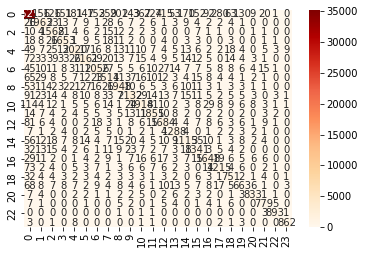

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.865335687211174
MSE: 9.999610571680773
RMSE: 3.1622160855451944


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.897325137204758
Recall Score :  0.8971389999480762
f1_score :  0.8951416733686582
